# Projeto 2 - Teoria dos Grafos (2021-2 PPGCC UNIFESP)
**Autor:** Gaspar Andrade  
**email:** gaspar.andrade@unifesp.br

Aplicação do algoritmo guloso **Jarnik-Prim** para encontrar as arvores de custo mínimo (Minimum Spanning Tree) em determinado grafo.

## Passos:
> **1.** Rodar o algoritmo guloso Prim  
> **2.** Pegar todas as combinações de vértices possíveis no grafo G.  
> **3.** Criar um grafo a partir da combinação desses vértices (método: (nx.Graph).add_edges_from(\<list\>))   
> **4.** Verificar se o grafo gerado é uma arvore e se o custo dessa árvore é igual ao custo mínimo encontrado pelo algoritmo  
> **5.** Se a condição for válida, retorna essa árvore.  
> **6.** Plotar todas as mst (minimum spanning trees).

---

In [82]:
import networkx as nx # Graph implementation
import matplotlib.pyplot as plt # Plot the networkx graphs
import queue # use PriorityQueue function to get min weights
from itertools import combinations # get all nodes combination

---

### Implementação

In [151]:
def prims_algo(g: nx.Graph, s) -> (nx.Graph, int):
    t = nx.Graph() # Empty graph to return as mst
    
    q = queue.PriorityQueue() # save the nodes 
    
    w_t = 0
    for n in g.neighbors(s): # verify the start vertex neighbors
        tmp = g.get_edge_data(s, n)['weight']
        q.put((tmp, (s, n)))
    
    visited = set()
    visited.add(s)
    
    while len(visited) < g.number_of_nodes():
        _, v = q.get() # get and remove edge with minimum value from queue
        if v[0] not in visited:
            new_v = v[0]
        elif v[1] not in visited:
            new_v = v[1]
        else: # if the nodes of actual edge was already visited, continue
            continue
        for n in g.neighbors(new_v):
            tmp = g.get_edge_data(new_v, n)['weight']
            q.put((tmp, (new_v, n)))
        tmp = g.get_edge_data(v[0], v[1])['weight']
        t.add_edge(v[0], v[1], weight=tmp)
        w_t = w_t + tmp # add edge cost to minimum cost value return
        
        visited.add(new_v)
    
    return t, w_t


def get_all_mst(g: nx.Graph, w: int) -> []:
    ret = []
    l = list(combinations(list(g.edges(data=True)), g.number_of_nodes()-1))
    
    for i in l:
        tmp = nx.Graph()
        tmp.add_edges_from(list(i))
        if nx.is_tree(tmp):
            if tmp.size(weight='weight') == w:
                ret.append(tmp)
    
    return ret

In [152]:
def plot_graph(g: nx.Graph) -> None:
    pos = nx.spring_layout(g, seed=7)

    # nodes
    nx.draw_networkx_nodes(g, pos, node_size=700, node_color='b')

    # edges
    nx.draw_networkx_edges(g, pos, width=4)

    # labels
    labels = nx.get_edge_attributes(g, 'weight')
    nx.draw_networkx_labels(g, pos, font_size=20, font_family='sans-serif')
    nx.draw_networkx_edge_labels(g, pos, edge_labels=labels)
    
    plt.show()

In [163]:
def find_mst(g: nx.Graph) -> None:
    _, cost = prims_algo(g, 'a') # can start by any node
    print("custo mínimo:", cost)
    arr = get_all_mst(g, cost)
    for i in arr:
        plot_graph(i)

---

### Example 1

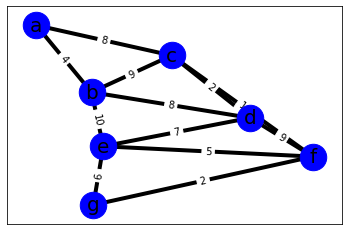

In [164]:
g = nx.Graph()
g.add_edge('a', 'b', weight=4)
g.add_edge('a', 'c', weight=8)
g.add_edge('b', 'c', weight=9)
g.add_edge('b', 'd', weight=8)
g.add_edge('c', 'd', weight=2)
g.add_edge('b', 'e', weight=10)
g.add_edge('c', 'f', weight=1)
g.add_edge('d', 'e', weight=7)
g.add_edge('d', 'f', weight=9)
g.add_edge('e', 'f', weight=5)
g.add_edge('e', 'g', weight=6)
g.add_edge('f', 'g', weight=2)

plot_graph(g)

custo mínimo: 22


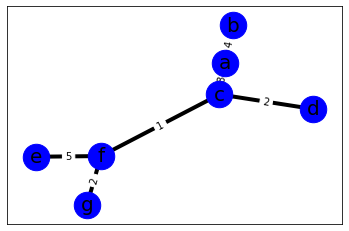

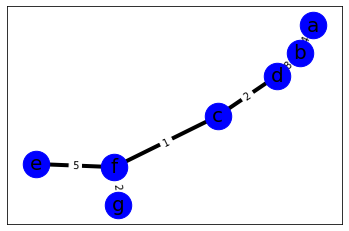

In [165]:
find_mst(g)

---

### Example 2

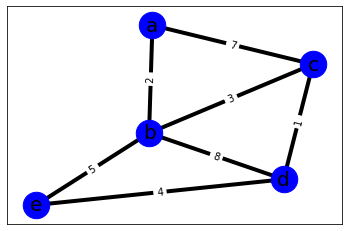

In [166]:
g = nx.Graph()
g.add_edge('a', 'b', weight=2)
g.add_edge('a', 'c', weight=7)
g.add_edge('b', 'c', weight=3)
g.add_edge('b', 'd', weight=8)
g.add_edge('b', 'e', weight=5)
g.add_edge('c', 'd', weight=1)
g.add_edge('d', 'e', weight=4)

plot_graph(g)

custo mínimo: 10


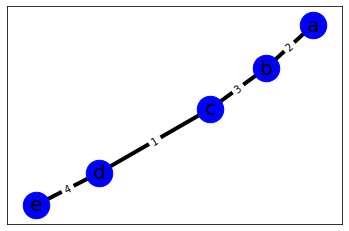

In [167]:
find_mst(g)

---

### Example 3

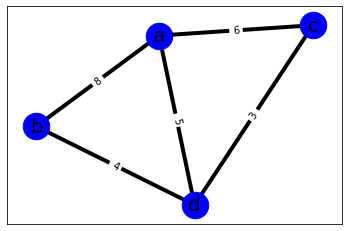

In [168]:
g = nx.Graph()
g.add_edge('a', 'b', weight=8)
g.add_edge('a', 'c', weight=6)
g.add_edge('b', 'd', weight=4)
g.add_edge('c', 'd', weight=3)
g.add_edge('a', 'd', weight=5)

plot_graph(g)

custo mínimo: 12


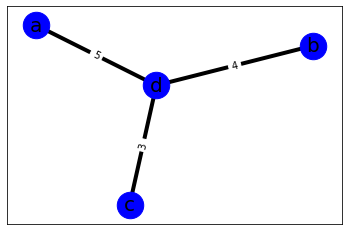

In [159]:
find_mst(g)

---

### Example 4

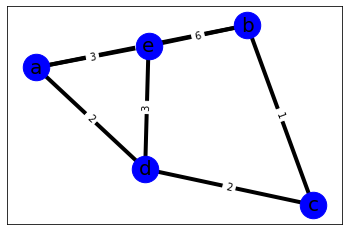

In [160]:
g = nx.Graph()
g.add_edge('a', 'b', weight=1)
g.add_edge('a', 'd', weight=2)
g.add_edge('a', 'e', weight=3)
g.add_edge('b', 'e', weight=6)
g.add_edge('b', 'c', weight=1)
g.add_edge('c', 'd', weight=2)
g.add_edge('d', 'e', weight=3)

plot_graph(g)

custo mínimo: 7


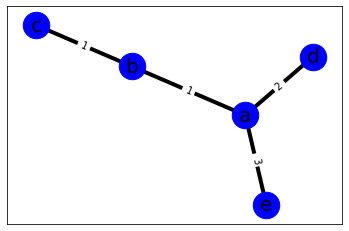

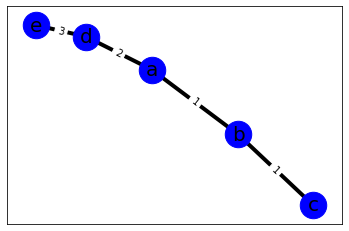

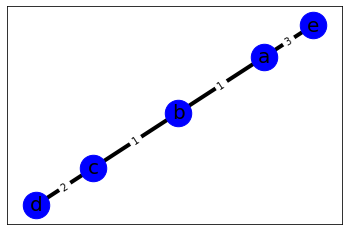

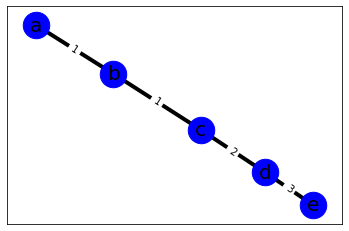

In [161]:
find_mst(g)

---

## Aplicação real
Artigo: Prim Algorithm Approach to Improving Local Access
Network in Rural Areas (Arogundade O. T., Sobowale B., and Akinwale A. T.) [2]


**Problema:**

Otimização de rotas no design de redes (e.g., transporte público, rede elétrica) em comunidades na Nigéria.


![table 1](./table1.png 'Tabela 1')

![figure 1](./figure1.png 'Figura 1')

![table 2](./table2.png 'Tabela 2')

![table 3](./table3.png 'Tabela 3')


**Conclusão**

A utilização do algoritmo Prim permite uma economia de combustivel e tempo no transporte nessas comunidades. Este trabalho permite a melhoria na qualidade de transporte dentro da Nigéria e também motiva o estudo em outras localidades.



---

## Referências
### [1] https://networkx.org/documentation/stable/reference/index.html
### [2] http://ijcte.org/papers/340-G469.pdf
### [3] https://docs.python.org/3/reference/